<a href="https://colab.research.google.com/github/Inuri92/CapstoneProject/blob/main/Capstoneproject_ModelBuilding_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model to Predict Maternal Health Risk



In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train test split
from sklearn.model_selection import train_test_split

# Classifier algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier #KNN

# Data visualization
from matplotlib import cm # Colomaps
from sklearn import tree

# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report

# Hyper Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV

#Load Processed Data

In [72]:
file_name = 'https://raw.githubusercontent.com/Inuri92/CapstoneProject/main/data_processed.csv'

# Load CSV File
data = pd.read_csv(file_name)
data.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,y_act
0,25,130,80,15.0,98.0,86,high risk,2
1,35,140,90,13.0,98.0,70,high risk,2
2,29,90,70,8.0,100.0,80,high risk,2
3,30,140,85,7.0,98.0,70,high risk,2
4,35,120,60,6.1,98.0,76,low risk,0


**Correlation**

In [73]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel', 'y_act'],
      dtype='object')

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,y_act
Age,1.000000,0.417292,0.398234,0.473299,-0.256640,0.067727,0.265618
SystolicBP,0.417292,1.000000,0.787198,0.425439,-0.286366,-0.018328,0.397768
DiastolicBP,0.398234,0.787198,1.000000,0.423803,-0.257702,-0.051542,0.346826
BS,0.473299,0.425439,0.423803,1.000000,-0.103765,0.149351,0.570097
BodyTemp,-0.256640,-0.286366,-0.257702,-0.103765,1.000000,0.097749,0.163177
HeartRate,0.067727,-0.018328,-0.051542,0.149351,0.097749,1.000000,0.190334
y_act,0.265618,0.397768,0.346826,0.570097,0.163177,0.190334,1.000000


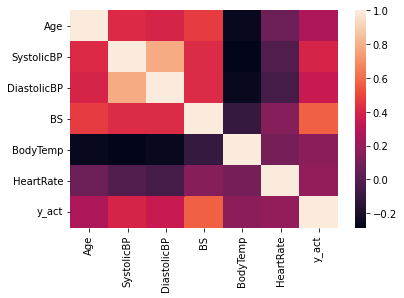

In [74]:
correlation_matrix = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'y_act']].corr()
sns.heatmap(correlation_matrix)
correlation_matrix

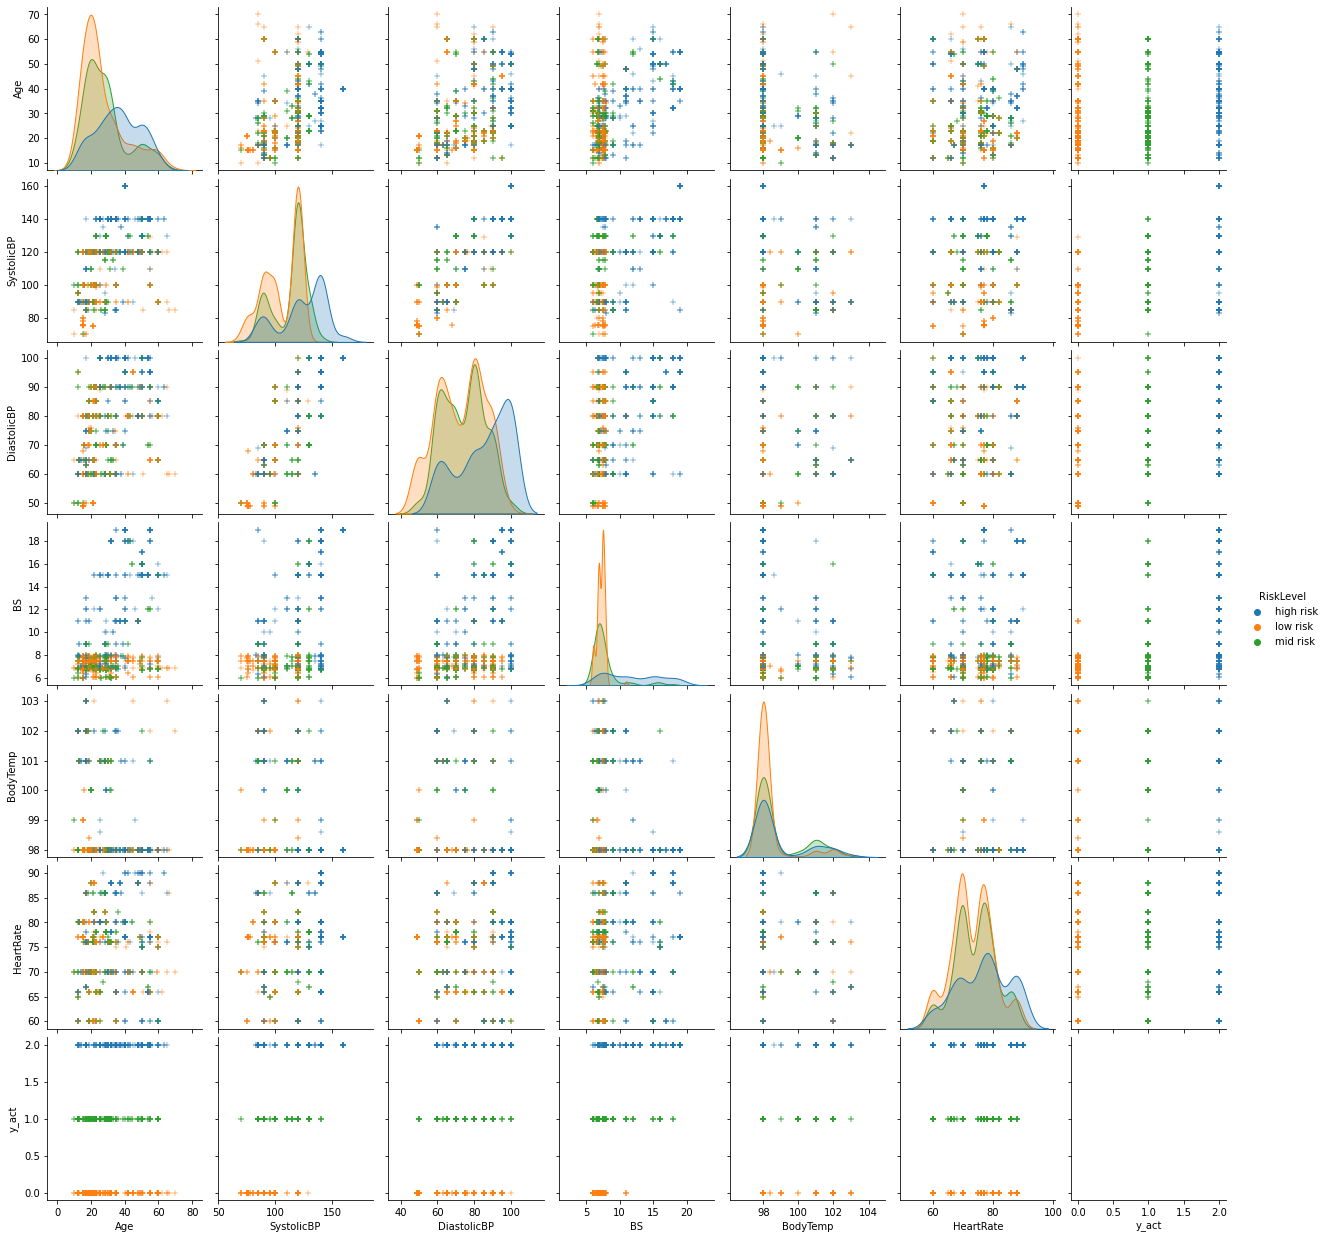

In [75]:
g = sns.pairplot(data, hue='RiskLevel', markers='+')
plt.show()

#Prepare Feature dataset (X variables) and y variable

In [76]:
X_variables = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
y_varibale = 'y_act'
X = data[X_variables]
y = data[y_varibale]

#Train Test Split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 809
Test sample size  = 203


# 1. Decision Tree Classifier

**Model Building**

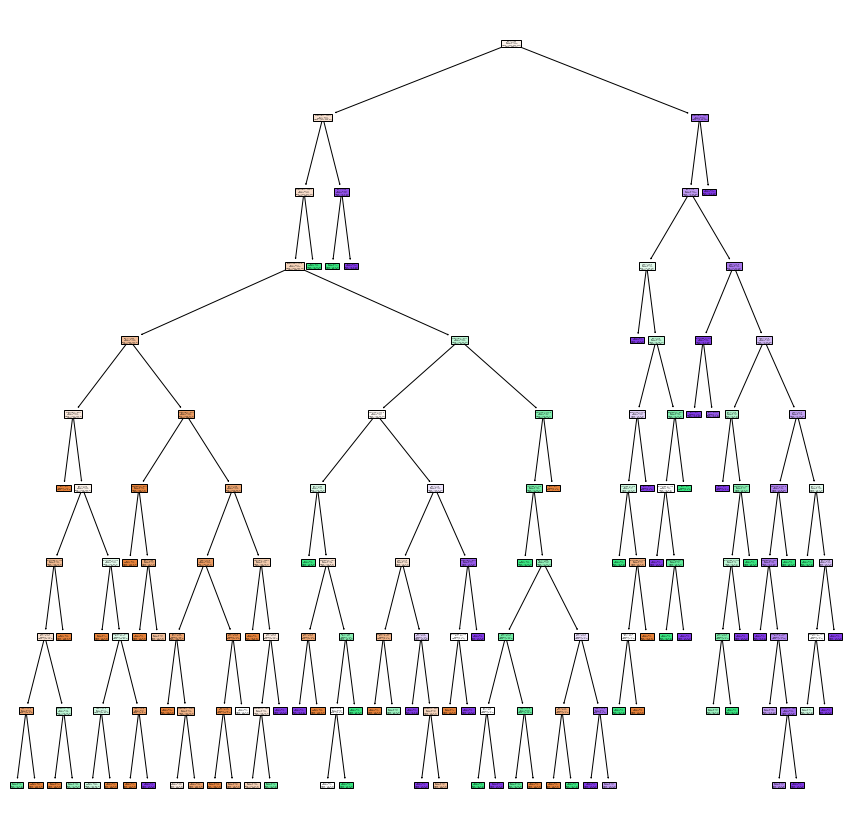

In [78]:
# Create model object
model = DecisionTreeClassifier(random_state=101, max_depth=10, min_samples_split=2)

# Train Model
model.fit(X_train, y_train)

#Visualize Decision Tree
pfig = plt.figure(figsize=(15,15))
class_names = data['RiskLevel'].unique()
tree.plot_tree(model, feature_names = X_variables, class_names=class_names, filled=True)
plt.show()

**Model Evaluation**

In [79]:
#Model Evaluation  function
def evaluate_model(model, X_test):
    y_pred = model.predict(X_test)

    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred})
    print(test_result.sample(10))
    print('\n')

    # Confussion Matrix
    cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
    print("Confusion Matrix:\n", cfm)
    print('\n')

    accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
    print("accuracy:", accuracy)

    precision = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='weighted')
    print("precision:",precision)

    recall = metrics.recall_score(test_result['y_act'], test_result['y_pred'], average='weighted')
    print("recall:",recall)

    f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
    print("f1_score:",f1_score)
    print('\n')

    print("classification_report:\n",classification_report(test_result['y_act'], test_result['y_pred']))
    
    return accuracy, precision, recall, f1_score 

In [80]:
accuracy_tc, precision_tc, recall_tc, f1_score_tc = evaluate_model(model,X_test)

     y_act  y_pred
25       0       0
275      0       0
29       0       0
464      0       1
213      0       1
924      0       1
388      0       0
314      0       1
578      0       0
10       0       0


Confusion Matrix:
 y_pred   0   1   2  All
y_act                  
0       51  28   4   83
1        8  59   5   72
2        0   5  43   48
All     59  92  52  203


accuracy: 0.7536945812807881
precision: 0.77641371156478
recall: 0.7536945812807881
f1_score: 0.7522393909292593


classification_report:
               precision    recall  f1-score   support

           0       0.86      0.61      0.72        83
           1       0.64      0.82      0.72        72
           2       0.83      0.90      0.86        48

    accuracy                           0.75       203
   macro avg       0.78      0.78      0.77       203
weighted avg       0.78      0.75      0.75       203



#2. Support Vector Machines

**Model Building**

In [81]:
# Create model object
model = svm.SVC(kernel='linear', C=1)

# Train Model
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

**Model Evaluation**

In [82]:
accuracy_svm, precision_svm, recall_svm, f1_score_svm = evaluate_model(model,X_test)

     y_act  y_pred
952      2       2
25       0       0
76       1       0
312      0       0
830      1       0
881      0       0
88       1       0
591      1       0
625      0       0
244      0       0


Confusion Matrix:
 y_pred   0   1   2  All
y_act                  
0       65  14   4   83
1       32  24  16   72
2        1   4  43   48
All     98  42  63  203


accuracy: 0.6502463054187192
precision: 0.6352501591769711
recall: 0.6502463054187192
f1_score: 0.6261982183811906


classification_report:
               precision    recall  f1-score   support

           0       0.66      0.78      0.72        83
           1       0.57      0.33      0.42        72
           2       0.68      0.90      0.77        48

    accuracy                           0.65       203
   macro avg       0.64      0.67      0.64       203
weighted avg       0.64      0.65      0.63       203



#3. K-Neighbors Classifier

**Model Building**

In [83]:
# Create model object
model = KNeighborsClassifier(n_neighbors=4)

# Train Model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

**Model Evaluation**

In [84]:
accuracy_knc, precision_knc, recall_knc, f1_score_knc = evaluate_model(model,X_test)

     y_act  y_pred
380      1       1
493      0       0
398      0       0
760      1       1
432      2       2
346      0       0
830      1       0
365      1       1
778      1       0
299      1       1


Confusion Matrix:
 y_pred   0   1   2  All
y_act                  
0       63  13   7   83
1       23  44   5   72
2        6   9  33   48
All     92  66  45  203


accuracy: 0.6896551724137931
precision: 0.6898372242450203
recall: 0.6896551724137931
f1_score: 0.688362362597503


classification_report:
               precision    recall  f1-score   support

           0       0.68      0.76      0.72        83
           1       0.67      0.61      0.64        72
           2       0.73      0.69      0.71        48

    accuracy                           0.69       203
   macro avg       0.69      0.69      0.69       203
weighted avg       0.69      0.69      0.69       203



#4. Random Forest Classifier

**Model Building**

In [85]:
# Create model object
model = RandomForestClassifier(n_estimators = 200, max_depth = 15)

# Train Model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=200)

**Model Evaluation**

In [86]:
accuracy_rf, precision_rf, recall_rf, f1_score_rf = evaluate_model(model,X_test)

     y_act  y_pred
946      0       1
836      1       1
549      1       2
208      0       0
70       1       1
643      2       2
705      1       1
209      0       0
388      0       0
754      1       1


Confusion Matrix:
 y_pred   0   1   2  All
y_act                  
0       64  14   5   83
1        7  61   4   72
2        0   4  44   48
All     71  79  53  203


accuracy: 0.8325123152709359
precision: 0.8387236193156898
recall: 0.8325123152709359
f1_score: 0.8324186236241102


classification_report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83        83
           1       0.77      0.85      0.81        72
           2       0.83      0.92      0.87        48

    accuracy                           0.83       203
   macro avg       0.83      0.84      0.84       203
weighted avg       0.84      0.83      0.83       203



#Comparing Models

In [87]:
metrics_comp = [['Decision Tree', accuracy_tc, precision_tc, recall_tc, f1_score_tc],
['Random Forest', accuracy_rf, precision_rf, recall_rf, f1_score_rf],
['SVM', accuracy_svm, precision_svm, recall_svm, f1_score_svm],
['K-Neighbour', accuracy_knc, precision_knc, recall_knc, f1_score_knc]]

pd.DataFrame(data=metrics_comp, columns=['Model', 'accuracy', 'precision', 'recall', 'f1_score'])

,Model,accuracy,precision,recall,f1_score
0,Decision Tree,0.753695,0.776414,0.753695,0.752239
1,Random Forest,0.832512,0.838724,0.832512,0.832419
2,SVM,0.650246,0.635250,0.650246,0.626198
3,K-Neighbour,0.689655,0.689837,0.689655,0.688362


#Hyper Parameter Tuning

Randomized Search

In [121]:
# Define Hyperparameter Grid
param_grid = {
              'n_estimators': [100, 200, 250],
              "max_depth": [10, 20, 50],
              "min_samples_leaf": [1, 2, 5],
              "min_samples_split": [2, 5, 10]
             }

# Create model object
model = RandomForestClassifier()
  
# Create RandomizedSearchCV object
model_cv = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 5)
  
model_cv.fit (X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Model Parameters: {}".format(model_cv.best_params_))
print("Best model score: {}".format(model_cv.best_score_))

Tuned Model Parameters: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Best model score: 0.8083965953531171


In [122]:
#model parameters
model = model_cv.best_estimator_
print("Model Parameters:\n", pd.Series(model.get_params()))
print('\n')

# Feature importance/Coefficients
importance = model.feature_importances_
features_to_model = X_variables
feature_profile = pd.DataFrame({"feature":features_to_model, "importance":importance})

print("sum of feature importance:",feature_profile['importance'].sum())
feature_profile = feature_profile.sort_values(by='importance', ascending=False)
print("feature_profile:\n", feature_profile)
print('\n')

Model Parameters:
 bootstrap                    True
ccp_alpha                     0.0
class_weight                 None
criterion                    gini
max_depth                      10
max_features                 auto
max_leaf_nodes               None
max_samples                  None
min_impurity_decrease         0.0
min_samples_leaf                1
min_samples_split               2
min_weight_fraction_leaf      0.0
n_estimators                  250
n_jobs                       None
oob_score                   False
random_state                 None
verbose                         0
warm_start                  False
dtype: object


sum of feature importance: 1.0
feature_profile:
        feature  importance
3           BS    0.352403
1   SystolicBP    0.210073
0          Age    0.137793
2  DiastolicBP    0.134168
5    HeartRate    0.090036
4     BodyTemp    0.075528




Text(0, 0.5, 'Feature Name')

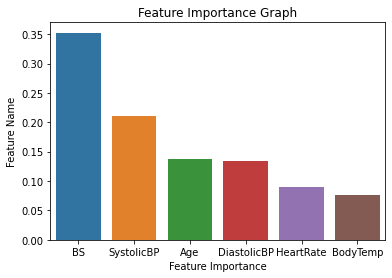

In [123]:
#Plot feature importance graph
sns.barplot(x=feature_profile['feature'], y=feature_profile['importance'])
plt.title( 'Feature Importance Graph')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')

#Save Model

In [124]:
import pickle

save_file = 'model_rf.pickle'
pickle.dump(model, open(save_file, 'wb'))

In [125]:
# Model testing
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob' : y_pred_prob})

# Confussion Matrix
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
print("Confusion Matrix:\n", cfm)
print('\n')

Confusion Matrix:
 y_pred   0   1   2  All
y_act                  
0       66  13   4   83
1        9  59   4   72
2        0   4  44   48
All     75  76  52  203




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


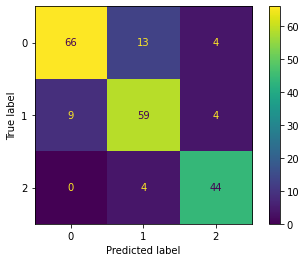

In [126]:
metrics.plot_confusion_matrix(model, X_test, y_test)

In [127]:
# Model evaluation matrices
print("f1_score:",metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted'))
print('\n')

print("classification_report:\n",classification_report(test_result['y_act'], test_result['y_pred']))

f1_score: 0.8324491505285918


classification_report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84        83
           1       0.78      0.82      0.80        72
           2       0.85      0.92      0.88        48

    accuracy                           0.83       203
   macro avg       0.83      0.84      0.84       203
weighted avg       0.84      0.83      0.83       203



In [128]:
# Calculate AUC OVO & OVR
print("Weighted_auc_score_ovo:", metrics.roc_auc_score(y_test,model.predict_proba(X_test), multi_class="ovo", average="weighted"))
print("Weighted_auc_score_ovr:", metrics.roc_auc_score(y_test,model.predict_proba(X_test), multi_class="ovr", average="weighted"))

Weighted_auc_score_ovo: 0.9291768881766804
Weighted_auc_score_ovr: 0.9212631143534011
